<a href="https://colab.research.google.com/github/ankile/Adversarial-Diffusion/blob/main/src/Result_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create barplot with the results for all models

In [ ]:
!pip install --upgrade matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

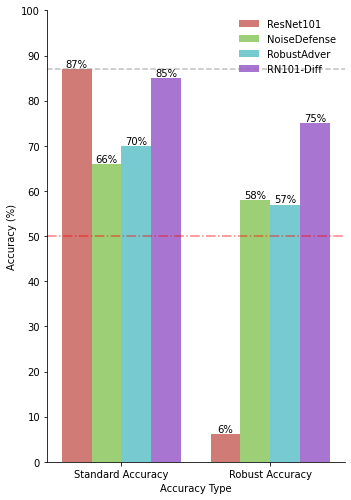

In [20]:
labels = ["Model", "Accuracy Type", "Accuracy (%)"]

df = pd.DataFrame(
    [
        ["ResNet101", "Standard Accuracy", 87],
        ["ResNet101", "Robust Accuracy", 6.2],
        ["NoiseDefense", "Standard Accuracy", 66],
        ["NoiseDefense", "Robust Accuracy", 58],
        ["RobustAdver", "Standard Accuracy", 70],
        ["RobustAdver", "Robust Accuracy", 57],
        ["RN101-Diff", "Standard Accuracy", 85],
        ["RN101-Diff", "Robust Accuracy", 75],
    ],
    columns=labels,
)

#sns.set_palette(sns.color_palette("hls", 8))

g = sns.catplot(
    data=df, kind="bar",
    x="Accuracy Type", y="Accuracy (%)", hue="Model",
    palette="hls", alpha=.9, legend_out=False, height=7, aspect=0.7,
)

plt.axhline(y=87, linestyle="--", color="grey", alpha=0.5)
plt.axhline(y=50, linestyle="-.", color="red", alpha=0.5)

plt.yticks(range(0, 101, 10), range(0, 101, 10))

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{v.get_height():.0f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

leg = plt.legend(frameon=False)
